<a href="https://colab.research.google.com/github/rhmdftrianto/A2_6-UNSUPERVISED/blob/main/UNSUPERVISED_%7C_IRIS_SPECIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PA DATA MINING**

KELOMPOK 6 / A2
- 2109116027 | RAHMAD FITRIANTO (KETUA)  
- 2109116023 | ANDI YOLANDA SAGITA
- 2109116029 | ERNI VERONICA SIDABUTAR

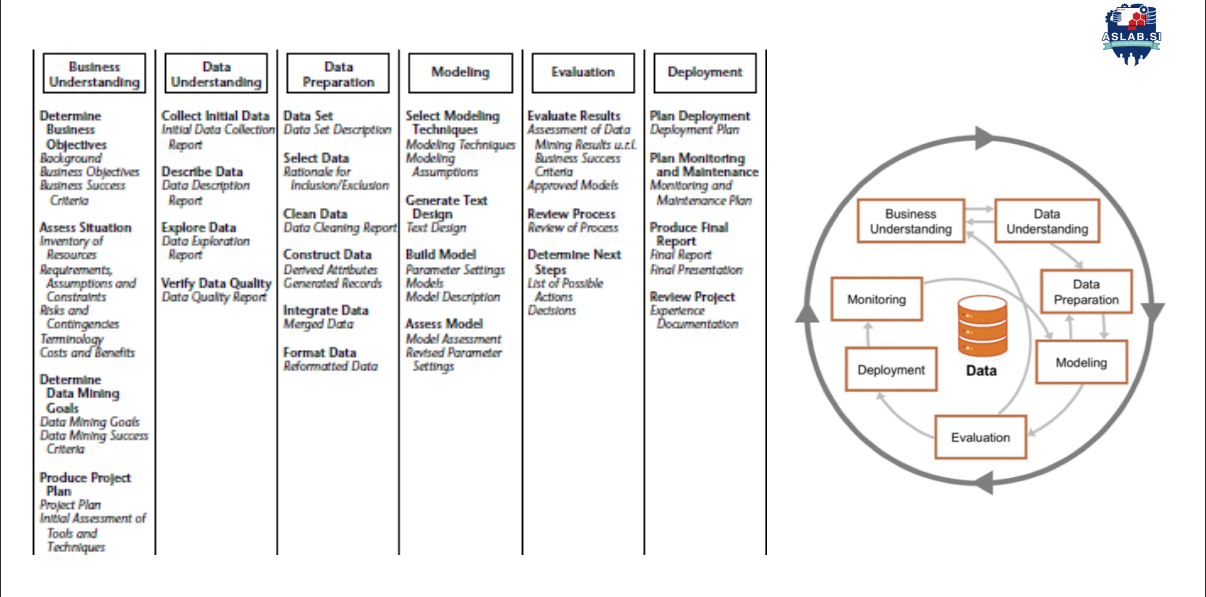

#**JUDUL DAN ALGORITMA**


#**UNSUPERVISED | IRIS SPECIES**

**ALGORITMA : KMEANS**

In [1]:
# Dataset google drive
link2 = "https://drive.google.com/file/d/1FZovBwRnfndmf1DdLfBJJQQZm9Rg8YPu/view?usp=share_link"

# Diubah jadi bentuk seperti ini
link_unsupervised= "https://drive.google.com/uc?id=1FZovBwRnfndmf1DdLfBJJQQZm9Rg8YPu"

In [2]:
# Untuk mengimport (mengakses) modul
# Untuk Tabulasi dan analisis
import pandas as pd

# Untuk perhitungan 
import numpy as np

# Untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##**BUSINESS UNDERSTANDING**


### **Determine Business Objectives**



  Sebuah perusahaan bunga ingin meningkatkan efisiensi dan produktivitas bisnis mereka dengan memanfaatkan teknologi machine learning. Perusahaan ini menjual berbagai macam jenis bunga, termasuk bunga Iris. Untuk meningkatkan bisnis mereka, perusahaan memutuskan untuk menerapkan algoritma K-means pada data Iris yang mereka kumpulkan selama beberapa waktu dari makalah klasik RA Fisher tahun 1936, The Use of Multiple Measurements in Taxonomic Problems , dan juga dapat ditemukan di UCI Machine Learning Repository.
  



### **Assess Situation**



  **Tools & Library** ---> Python + Colab, Google Studio, Pandas, Seaborn, Numpy, Matplotlib, Plotly, Warnings

  **Cost**

  Memerlukan storage yang lebih besar untuk menyimpan file dataset yang ukurannya besar, memerlukan waktu dan tenaga ekstra dalam mengelolah dataset, dan biaya ahli machine learning.

  **Benefit**

  Mendapat gambaran tentang pengelompokan jenis-jenis bunga iris berdasarkan karakteristik mereka (panjang dan lebar kelopak dan mahkota bunga).


###**Determine Data Mining Goals**

  Tujuan analisis menggunakan data mining ini adalah untuk mengelompokkan jenis-jenis bunga Iris berdasarkan karakteristik, menganalisis karakteristik yang mempengaruhi pengelompokan jenis bunga iris menggunakan algoritma K-means.




###**Produce Project Plan**

  Berikut penjadwalan tugas yang dilakukan https://docs.google.com/spreadsheets/d/1Vgjk84FeOS9TDlEkqy-wt3eTHUfSXnAna5jUdmPUq74/edit?usp=sharing

##**DATA UNDERSTANDING**

###**Collect Initial Data**

  Dataset Iris Species didapakan dari situs (website) resmi kaggle (sumber-data)

  Link Dataset : https://www.kaggle.com/datasets/uciml/iris

  Kemudian dataset ini diekspor ke G-Drive agar lebih mudah digunakan

  Link G-Drive Dataset : https://drive.google.com/uc?id=1A5gBTYJQ4KXptdsFh79EOByJhyEa0-8K

In [3]:
# Collect Initial Data
df_uns = pd.read_csv(link_unsupervised)

In [4]:
# Menghapus Kolom ID (Karena tidak dibutuhkan)
df_uns.drop('Id', axis=1, inplace=True)

###**Describe Data**

Dataset yang digunakan memiliki 150 baris data pada UCI Machine Learning Database, yang tersusun dalam 5 kolom.

  Deskripsi dari 4 Kolom tersebut yaitu:
  1. Sepal Length (Panjang Kelopak): mengukur panjang kelopak bunga iris dari pangkal hingga ujung, diukur dalam sentimeter. Kelopak adalah bagian luar bunga yang menutupi dan melindungi bunga saat masih muda. Panjang kelopak dapat memberikan informasi tentang ukuran bunga secara keseluruhan.
  
  2. Sepal Width (Lebar Kelopak): mengukur lebar kelopak bunga iris pada bagian terlebar, diukur dalam sentimeter. Lebar kelopak dapat memberikan informasi tentang bentuk dan ukuran bunga secara keseluruhan.
 
  3. Petal Length (Panjang Mahkota): mengukur panjang mahkota bunga iris dari pangkal hingga ujung, diukur dalam sentimeter. Mahkota adalah bagian bunga yang lebih jelas dan biasanya lebih menarik secara visual daripada kelopak. Panjang mahkota dapat memberikan informasi tentang karakteristik bunga, seperti tinggi dan bentuk mahkota.
  4. Petal Width (Lebar Mahkota): mengukur lebar mahkota bunga iris pada bagian terlebar, diukur dalam sentimeter. Lebar mahkota dapat memberikan informasi tentang bagaimana mahkota bunga iris menjalar dan membuka pada ujungnya. Fitur ini juga dapat memberikan informasi tentang ukuran dan bentuk mahkota secara keseluruhan.
  5. Species : mengelompokan bunga iris berdasarkan 3 kelompok yaitu iris-setosa, Iris-versicolor, iris-virginica


In [5]:
# Menampilkan dataset
df_uns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Menampilkan 5 baris pertama
df_uns.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Menampilkan jumlah baris data (record data), dan jumlah kolom
# Terdapat 150 baris data (record data), 5 kolom pada data ini
df_uns.shape

(150, 5)

In [8]:
# Menampilkan deskriptif statistik data
df_uns.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Explore Data**

####**Univariate Analysis**

Analisis ini dilakukan pada setiap variabel secara individual.

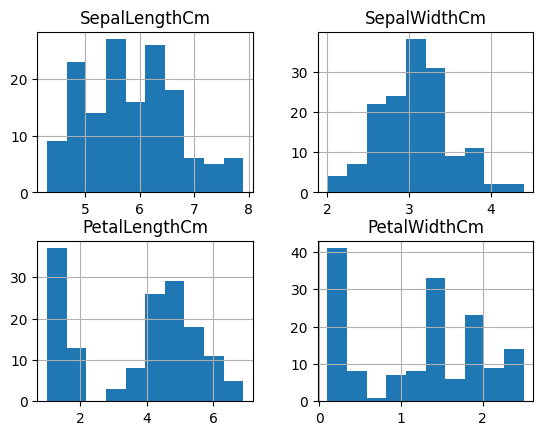

In [9]:
# Membuat histogram untuk melihat distribusi nilai pada setiap kolom
df_uns.hist(bins=10)
plt.show()

Menampilkan distribusi nilai pada setiap kolom, dengan jumlah bin sebanyak 10. Dapat dilihat bahwa sepal_length dan sepal_width cenderung normal, sedangkan petal_length dan petal_width memiliki beberapa puncak yang mengindikasikan adanya beberapa kelompok nilai yang berbeda.

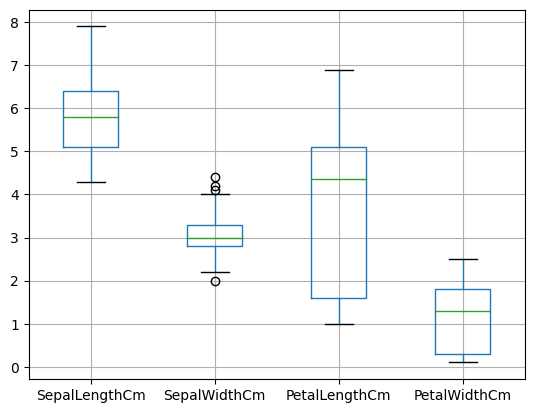

In [10]:
# Membuat boxplot untuk melihat persebaran nilai pada setiap kolom
df_uns.boxplot()
plt.show()

Menampilkan persebaran nilai pada setiap kolom, dengan garis tengah menunjukkan median dan kotak menunjukkan kuartil 1 dan 3. Dapat dilihat bahwa sepal_length dan sepal_width memiliki persebaran nilai yang cukup homogen, sedangkan petal_length dan petal_width memiliki nilai yang lebih bervariasi.

####**Bivariate Analysis**

Analisis ini dilakukan pada dua variabel secara bersamaan untuk melihat hubungan antara keduanya.

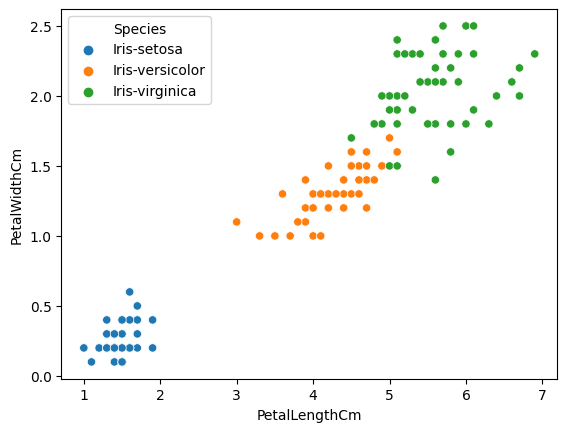

In [11]:
# Membuat scatterplot untuk melihat hubungan antara petal_length dan petal_width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df_uns)
plt.show()

Menampilkan hubungan antara petal_length dan petal_width dalam bentuk scatterplot, dengan warna yang berbeda untuk setiap species. Dapat dilihat bahwa petal_length dan petal_width memiliki hubungan yang sangat kuat dan membedakan species dengan jelas.

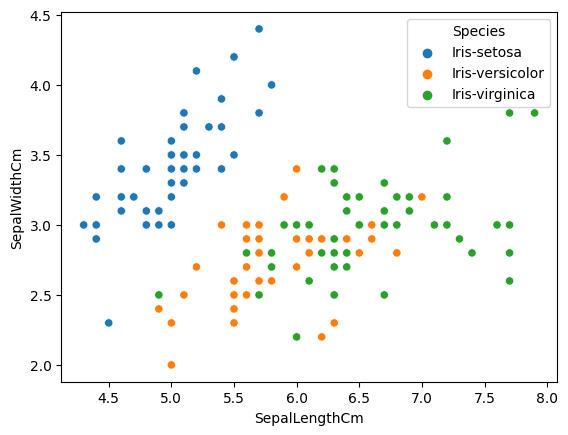

In [12]:
# Membuat scatterplot untuk melihat hubungan antara sepal_length dan sepal_width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df_uns)
plt.show()

Menampilkan hubungan antara sepal_length dan sepal_width dalam bentuk scatterplot, dengan warna yang berbeda untuk setiap species. Dapat dilihat bahwa sepal_length dan sepal_width memiliki hubungan yang kurang jelas dan tidak terlalu membedakan species dengan jelas.

####**Multivariate Analysis**

Analisis ini dilakukan pada tiga atau lebih variabel untuk melihat interaksi antar variabel dan bagaimana variabel-variabel tersebut mempengaruhi satu sama lain.

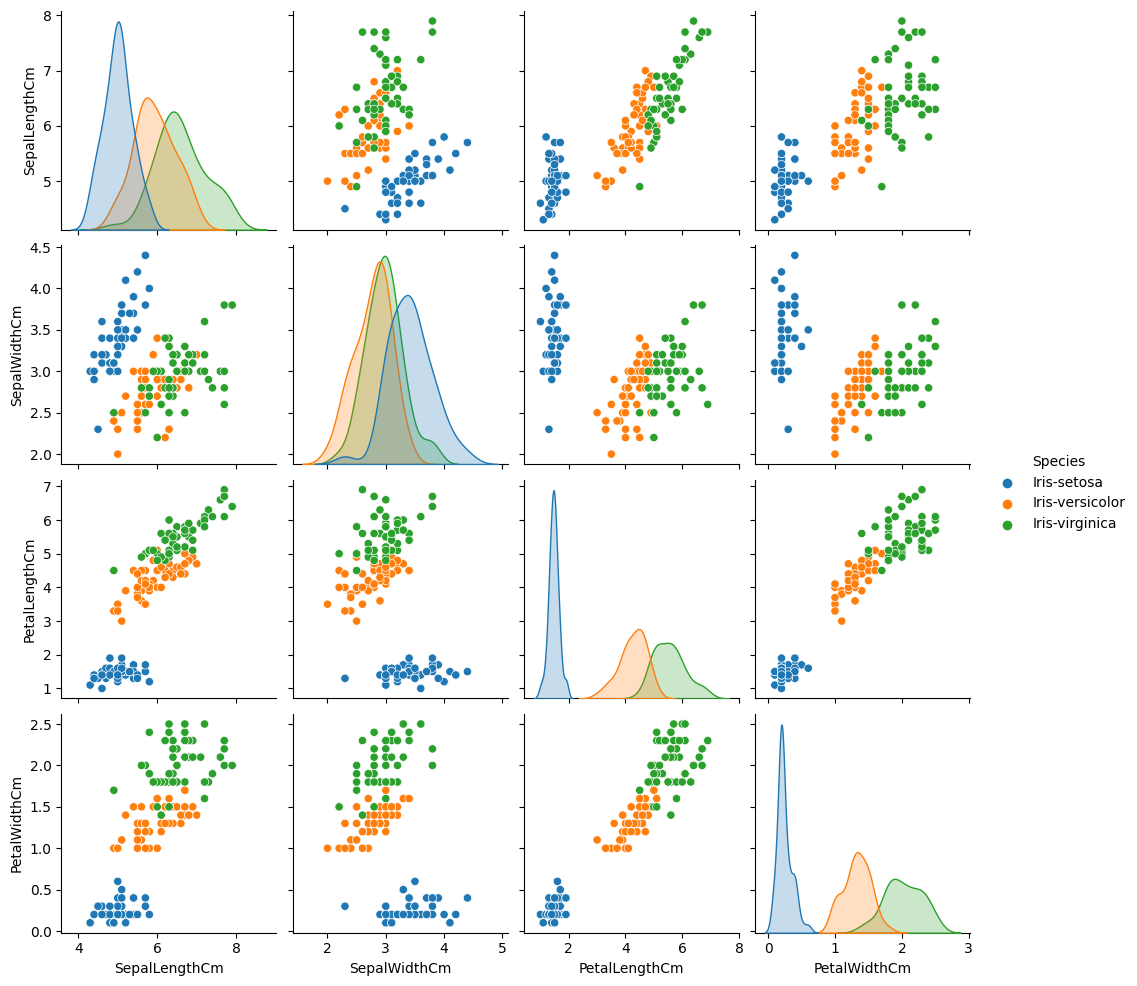

In [13]:
# Membuat pairplot untuk melihat hubungan antar variabel
sns.pairplot(df_uns, hue='Species')
plt.show()

Menampilkan hubungan antar variabel dalam bentuk scatterplot dan histogram, dengan warna yang berbeda untuk setiap species (jenis bunga iris). Dapat dilihat bahwa petal_length dan petal_width memiliki hubungan yang kuat dan berbeda untuk setiap species, sedangkan sepal_length dan sepal_width tidak terlalu membedakan species dengan jelas.

<ipython-input-14-32c5a0c5803d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_uns.corr()


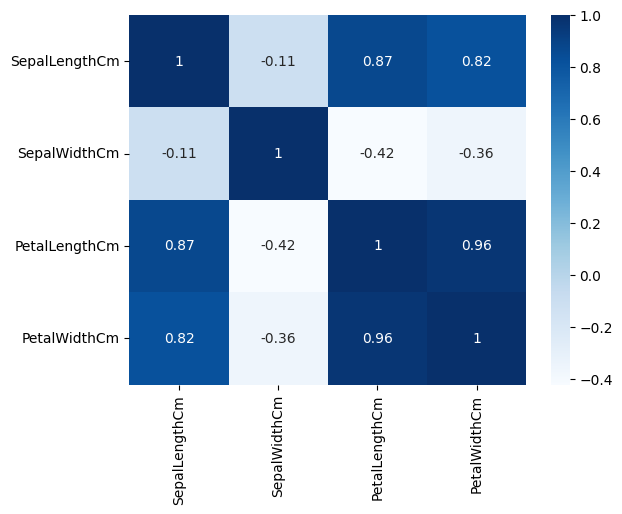

In [14]:
# Membuat heatmap untuk melihat korelasi antar kolom
corr_matrix = df_uns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

Menampilkan korelasi antar kolom dengan warna yang mengindikasikan kekuatan korelasinya. Dapat dilihat bahwa sepal_length dan sepal_width memiliki korelasi yang rendah, sedangkan petal_length dan petal_width memiliki korelasi yang sangat kuat.

##**DATA PREPARATION**

### **Select Data**

  Data utama yang digunakan bersumber dari tabel Iris.csv

### **Clean Data**
  1. Data Type
  2. Missing Value
  3. Handling Duplicate Data





  1. **Data Type**

In [15]:
#  Menampilkan dataset unsupervised
df_uns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# Menampilkan informasi detail tentang dataset
df_uns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
# Menampilkan informasi type data yang digunakan pada kolom dataset
df_uns.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Dapat dilihat diatas terdapat summary yang berisi rata-rata, standar deviasi, nilai max dan niali min, quartil 1, quartil 2 (median) , dan quartil 3

  2. **Missing Value**

In [18]:
# Mengechek dataset apakah terdapat missing value
df_uns.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dapat dilihat diatas bahwa pada dataset kolom Species tidak terdapat empty string atau NaN (kosong)

In [19]:
df_uns[df_uns.Species.isin([" ",np.nan])]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Dapat dilihat diatas bahwa pada dataset kolom Species tidak terdapat empty string atau NaN (kosong)

  3. **Handling Duplicate Data**

In [20]:
df_uns[df_uns.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Terdapat 3 baris yang duplikat 

In [21]:
# Menghapus data duplikat
df_uns.drop_duplicates(inplace=True)
df_uns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Dalam dataset iris ini, format datanya sudah cukup konsisten dan tidak ada perbedaan format atau tipe data yang signifikan. Oleh karena itu, tahapan construct data, integrate data, dan format data tidak diperlukan.

#**MODELING**

##Select Modelling Techniques

Pada penelitian ini, algoritma clustering yang akan digunakan adalah algoritma K-Means. Algoritma K-means adalah metode clustering unsupervised learning yang dapat digunakan untuk melakukan segmentasi data bunga iris berdasarkan ciri-ciri sepal length, sepal width, petal length, dan petal width. Algoritma ini akan membagi data ke dalam k grup berdasarkan jarak Euclidean antara setiap data dan pusat kluster.

Pusat kluster awal dipilih secara acak dan dihitung ulang setelah setiap iterasi. Proses ini berulang hingga pusat kluster tidak berubah atau iterasi telah mencapai batas tertentu.

Jumlah kluster dapat ditentukan sebelumnya atau dengan menggunakan metode elbow untuk menemukan jumlah kluster yang optimal. Metode elbow akan menentukan titik di mana penambahan kluster tidak memberikan peningkatan yang signifikan pada variance dalam kluster.

Output dari algoritma K-means adalah kluster yang berisi data-data yang serupa di dalamnya. Hasil segmentasi ini dapat digunakan untuk memahami perbedaan antara jenis-jenis bunga iris dan meningkatkan pemahaman tentang karakteristik mereka.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import time

## Pre Processing

In [23]:
train = pd.get_dummies(df_uns)

In [24]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train)

##Modelling

###Select Optimal K Value

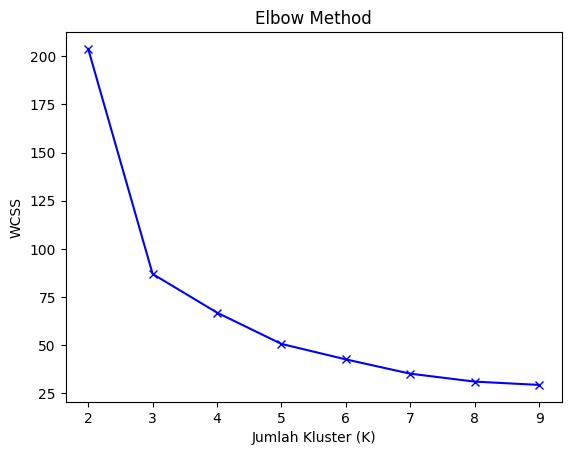

In [25]:
# Menentukan jumlah klaster yang optimal dalam algoritma KMeans
import warnings
warnings.filterwarnings("ignore")
elbow_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    elbow_scores.append(kmeans.inertia_)

plt.plot(k_range, elbow_scores,"bx-")
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

###Calculating KMeans


Untuk melakukan analisis segmentasi data iris dengan menggunakan algoritma K-means, akan dibuat sebuah kelas bernama Kmeans yang berisi beberapa fungsi yang penting. Fungsi-fungsi tersebut akan digunakan untuk menentukan kluster mana sebuah baris data iris akan ditempatkan serta menentukan pusat kluster secara acak. Dengan adanya kelas Kmeans ini, proses pengembangan algoritma K-means pada dataset iris akan menjadi lebih terstruktur dan efisien.

In [26]:
# Implementasi dari algoritma k-means untuk clustering data. 

class Kmeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [27]:
number_of_clusters = 3
kmeans = Kmeans(n_clusters=number_of_clusters)
kmeans.train(df=train, verbose=False)

In [28]:
# Extract the results
train['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
df2 = pd.concat([train, centroids])
df2.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_Iris-setosa', 'Species_Iris-versicolor',
       'Species_Iris-virginica', 'cluster'],
      dtype='object')

In [29]:
# Membuat DataFrame kosong untuk hasil decode
X_train_decoded = pd.DataFrame()

# Kolom-kolom yang akan digabungkan
species_cols = ['Species_Iris-setosa', 'Species_Iris-versicolor',
       'Species_Iris-virginica']

# Menambahkan kolom-kolom numerik
X_train_decoded['SepalLengthCm'] = df2['SepalLengthCm']
X_train_decoded['SepalWidthCm'] = df2['SepalWidthCm']
X_train_decoded['PetalLengthCm'] = df2['PetalLengthCm']
X_train_decoded['PetalWidthCm'] = df2['PetalWidthCm']
X_train_decoded['cluster'] = df2['cluster']

# Menggabungkan kolom-kolom yang sama dan menjadikan sebagai satu kolom
X_train_decoded['Species'] = df2[species_cols].idxmax(axis=1).str.split('_', expand=True)[1]
X_train_decoded

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,Species
0,5.100000,3.500000,1.400000,0.200000,0.0,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,2.0,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,2.0,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,2.0,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,0.0,Iris-setosa
...,...,...,...,...,...,...
148,6.200000,3.400000,5.400000,2.300000,1.0,Iris-virginica
149,5.900000,3.000000,5.100000,1.800000,1.0,Iris-virginica
0,5.255556,3.670370,1.503704,0.288889,centroid,Iris-setosa
1,6.278571,2.877551,4.923469,1.679592,centroid,Iris-versicolor


###2D Plotting

Fungsi di bawah merupakan fungsi untuk menampilkan kluster

In [30]:
def plot_cluster(cluster_df):
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(3, 4, figsize=(24, 18))
    cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    for i, col in enumerate(cols):
        sns.histplot(data=cluster_df, x=col, kde=True, ax=ax[0][i])
        sns.boxplot(data=cluster_df, x=col, ax=ax[1][i])
        sns.histplot(data=cluster_df, x=col, hue='Species', kde=True, ax=ax[2][i])
    sns.countplot(data=cluster_df, x="Species", ax=ax[2][3])
    plt.tight_layout()
    plt.show()

In [31]:
cluster1 = X_train_decoded[X_train_decoded['cluster'] == 0]
cluster2 = X_train_decoded[X_train_decoded['cluster'] == 1]
cluster3 = X_train_decoded[X_train_decoded['cluster'] == 2]

In [32]:
cluster1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,27.000000,27.000000,27.000000,27.000000
mean,5.255556,3.670370,1.503704,0.288889
std,0.235884,0.279855,0.153125,0.118754
min,5.000000,3.300000,1.200000,0.100000
25%,5.100000,3.450000,1.400000,0.200000
50%,5.200000,3.600000,1.500000,0.200000
75%,5.400000,3.800000,1.600000,0.400000
max,5.800000,4.400000,1.900000,0.600000


Berikut adalah ciri-ciri dari cluster 1 pada dataset iris:

- Rata-rata panjang kelopak (SepalLengthCm) adalah 6.28 cm
- Rata-rata lebar kelopak (SepalWidthCm) adalah 2.88 cm
- Rata-rata panjang mahkota (PetalLengthCm) adalah 4.92 cm
- Rata-rata lebar mahkota (PetalWidthCm) adalah 1.68 cm
- Jumlah pengamatan pada cluster 1 adalah 98
- Rentang nilai pada setiap fitur:
  1. SepalLengthCm: antara 4.9 cm hingga 7.9 cm
  2. SepalWidthCm: antara 2.0 cm hingga 3.8 cm
  3. PetalLengthCm: antara 3.3 cm hingga 6.9 cm
  4. PetalWidthCm: antara 1.0 cm hingga 2.5 cm

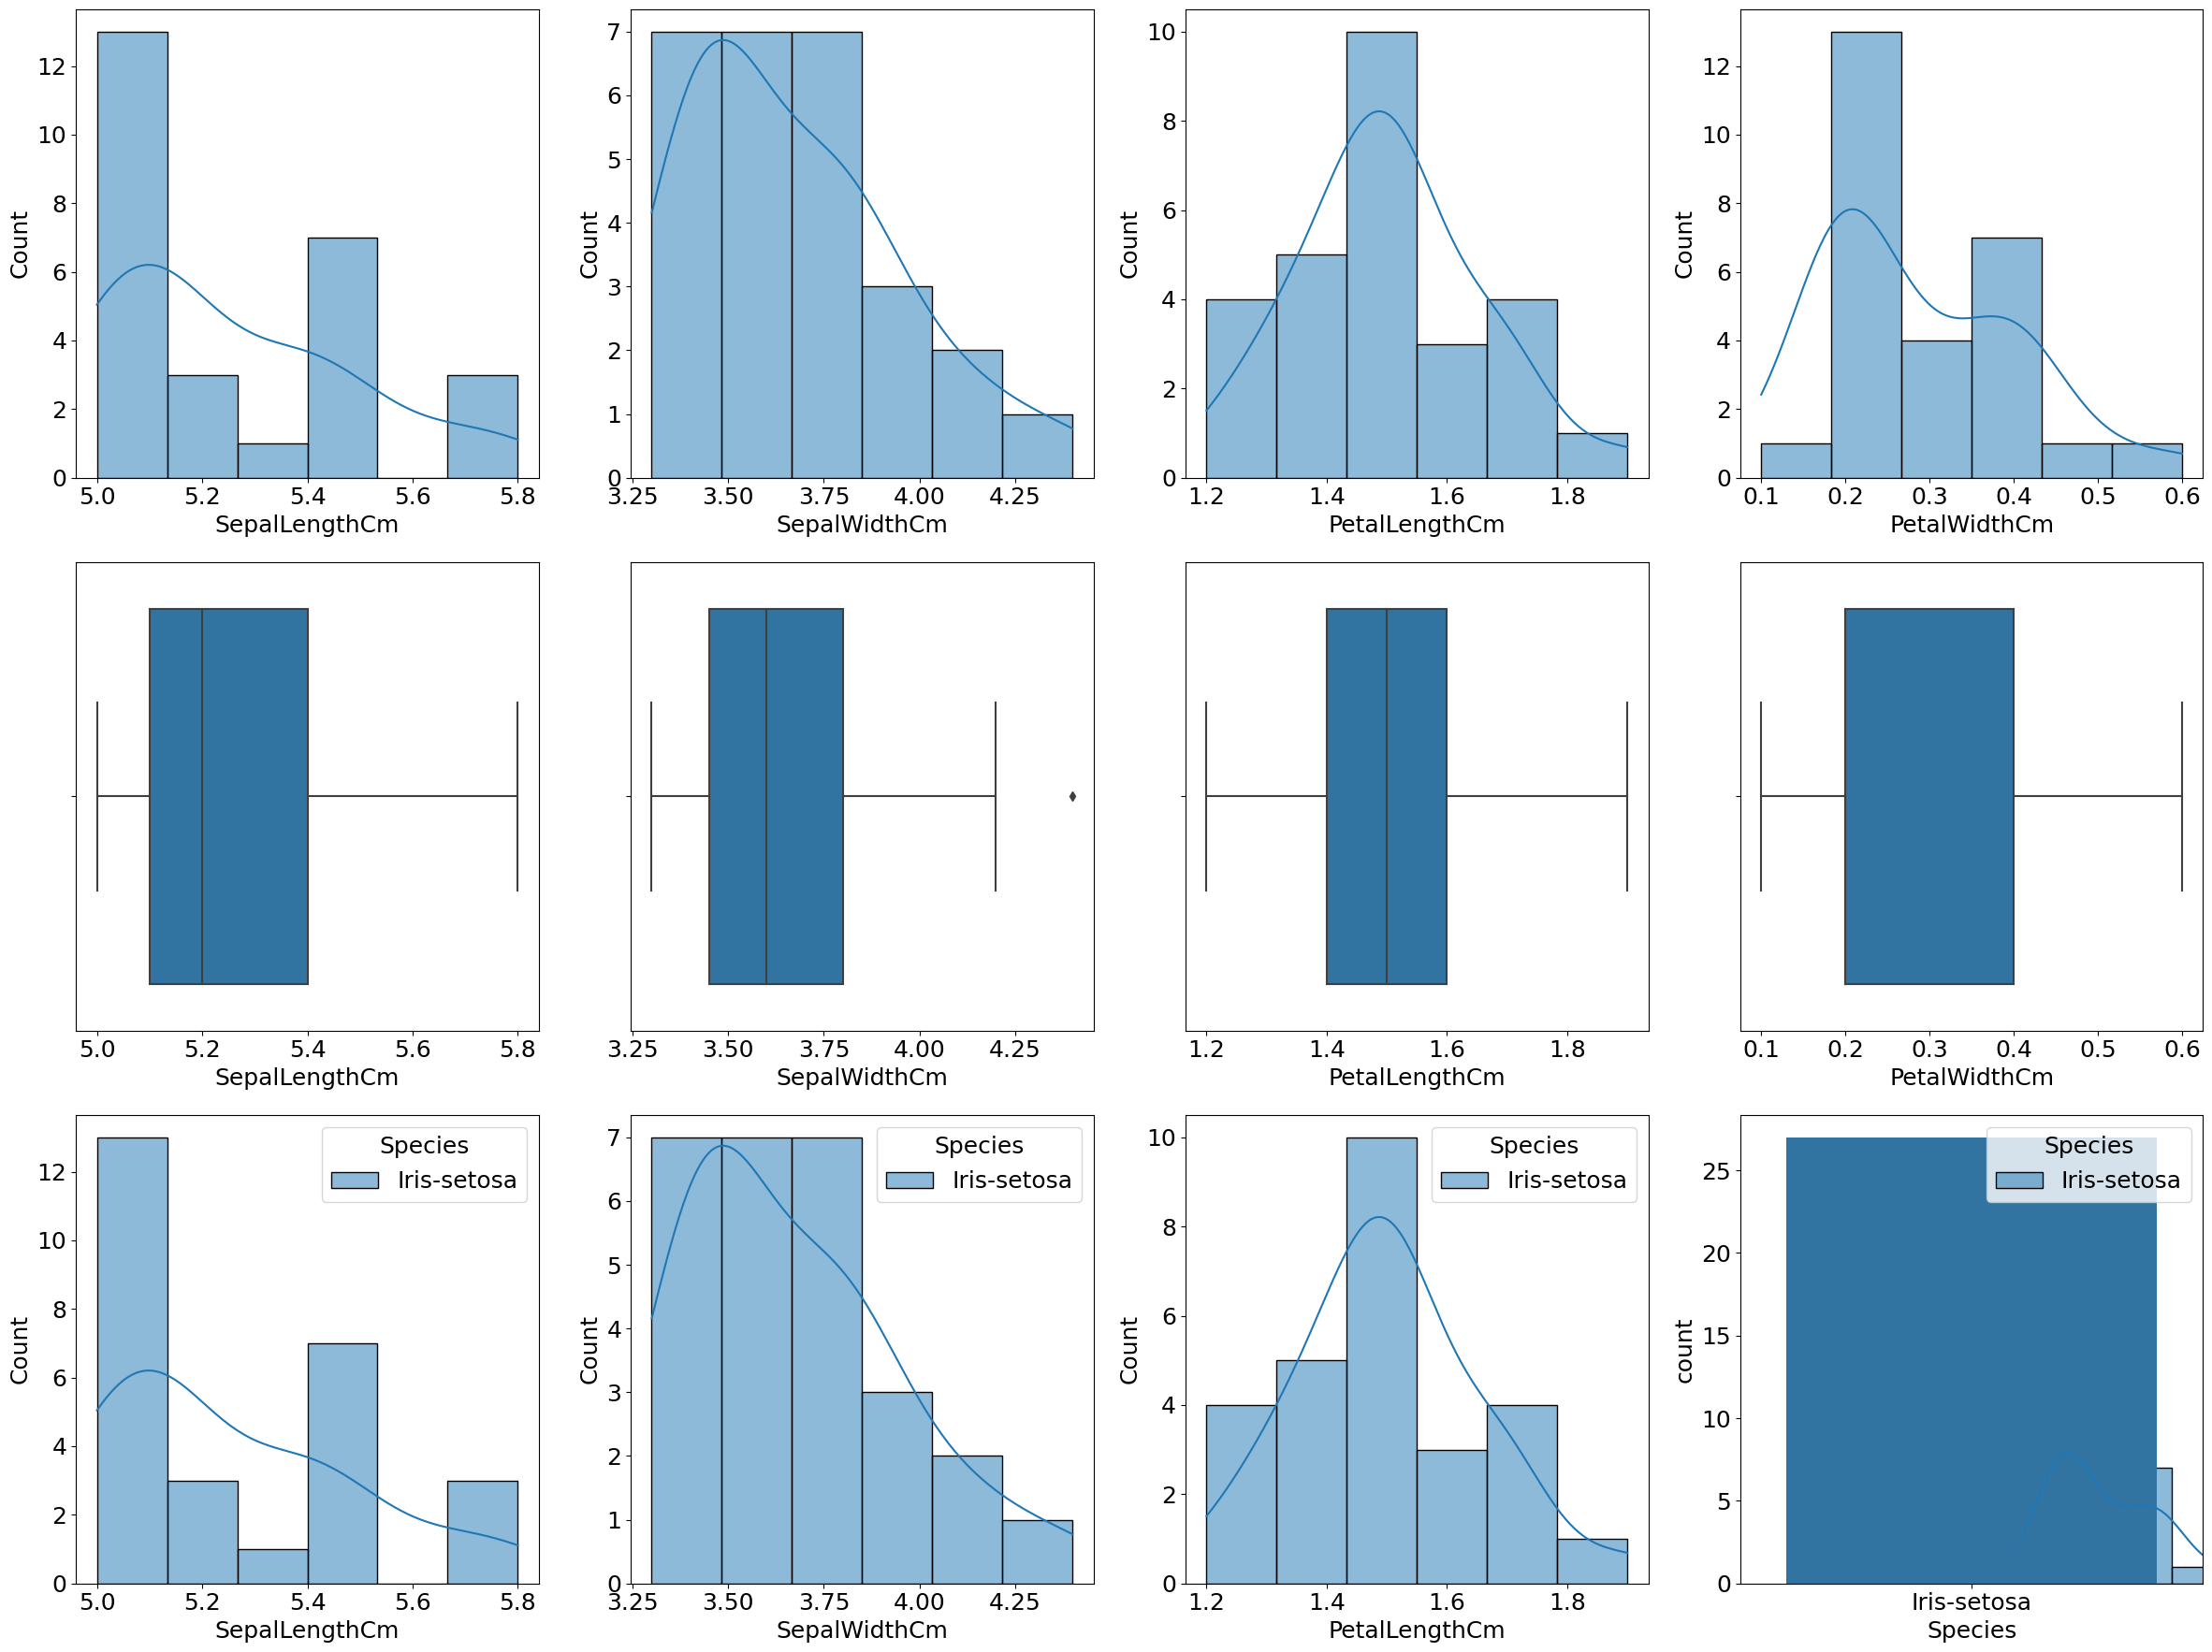

In [33]:
plot_cluster(cluster1)

In [34]:
cluster2.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,98.000000,98.000000,98.000000,98.000000
mean,6.278571,2.877551,4.923469,1.679592
std,0.657275,0.333532,0.810854,0.424497
min,4.900000,2.000000,3.300000,1.000000
25%,5.800000,2.700000,4.400000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.075000,5.575000,2.000000
max,7.900000,3.800000,6.900000,2.500000


Berikut adalah ciri-ciri dari cluster 2 pada dataset iris:

- Rata-rata panjang kelopak (SepalLengthCm) adalah 4.75 cm
- Rata-rata lebar kelopak (SepalWidthCm) adalah 3.13 cm
- Rata-rata panjang mahkota (PetalLengthCm) adalah 1.50 cm
- Rata-rata lebar mahkota (PetalWidthCm) adalah 0.26 cm
- Jumlah pengamatan pada cluster 2 adalah 25
- Rentang nilai pada setiap fitur:
  1. SepalLengthCm: antara 4.3 cm hingga 5.1 cm
  2. SepalWidthCm: antara 2.3 cm hingga 3.6 cm
  3. PetalLengthCm: antara 1.0 cm hingga 3.0 cm
  4. PetalWidthCm: antara 0.1 cm hingga 1.1 cm

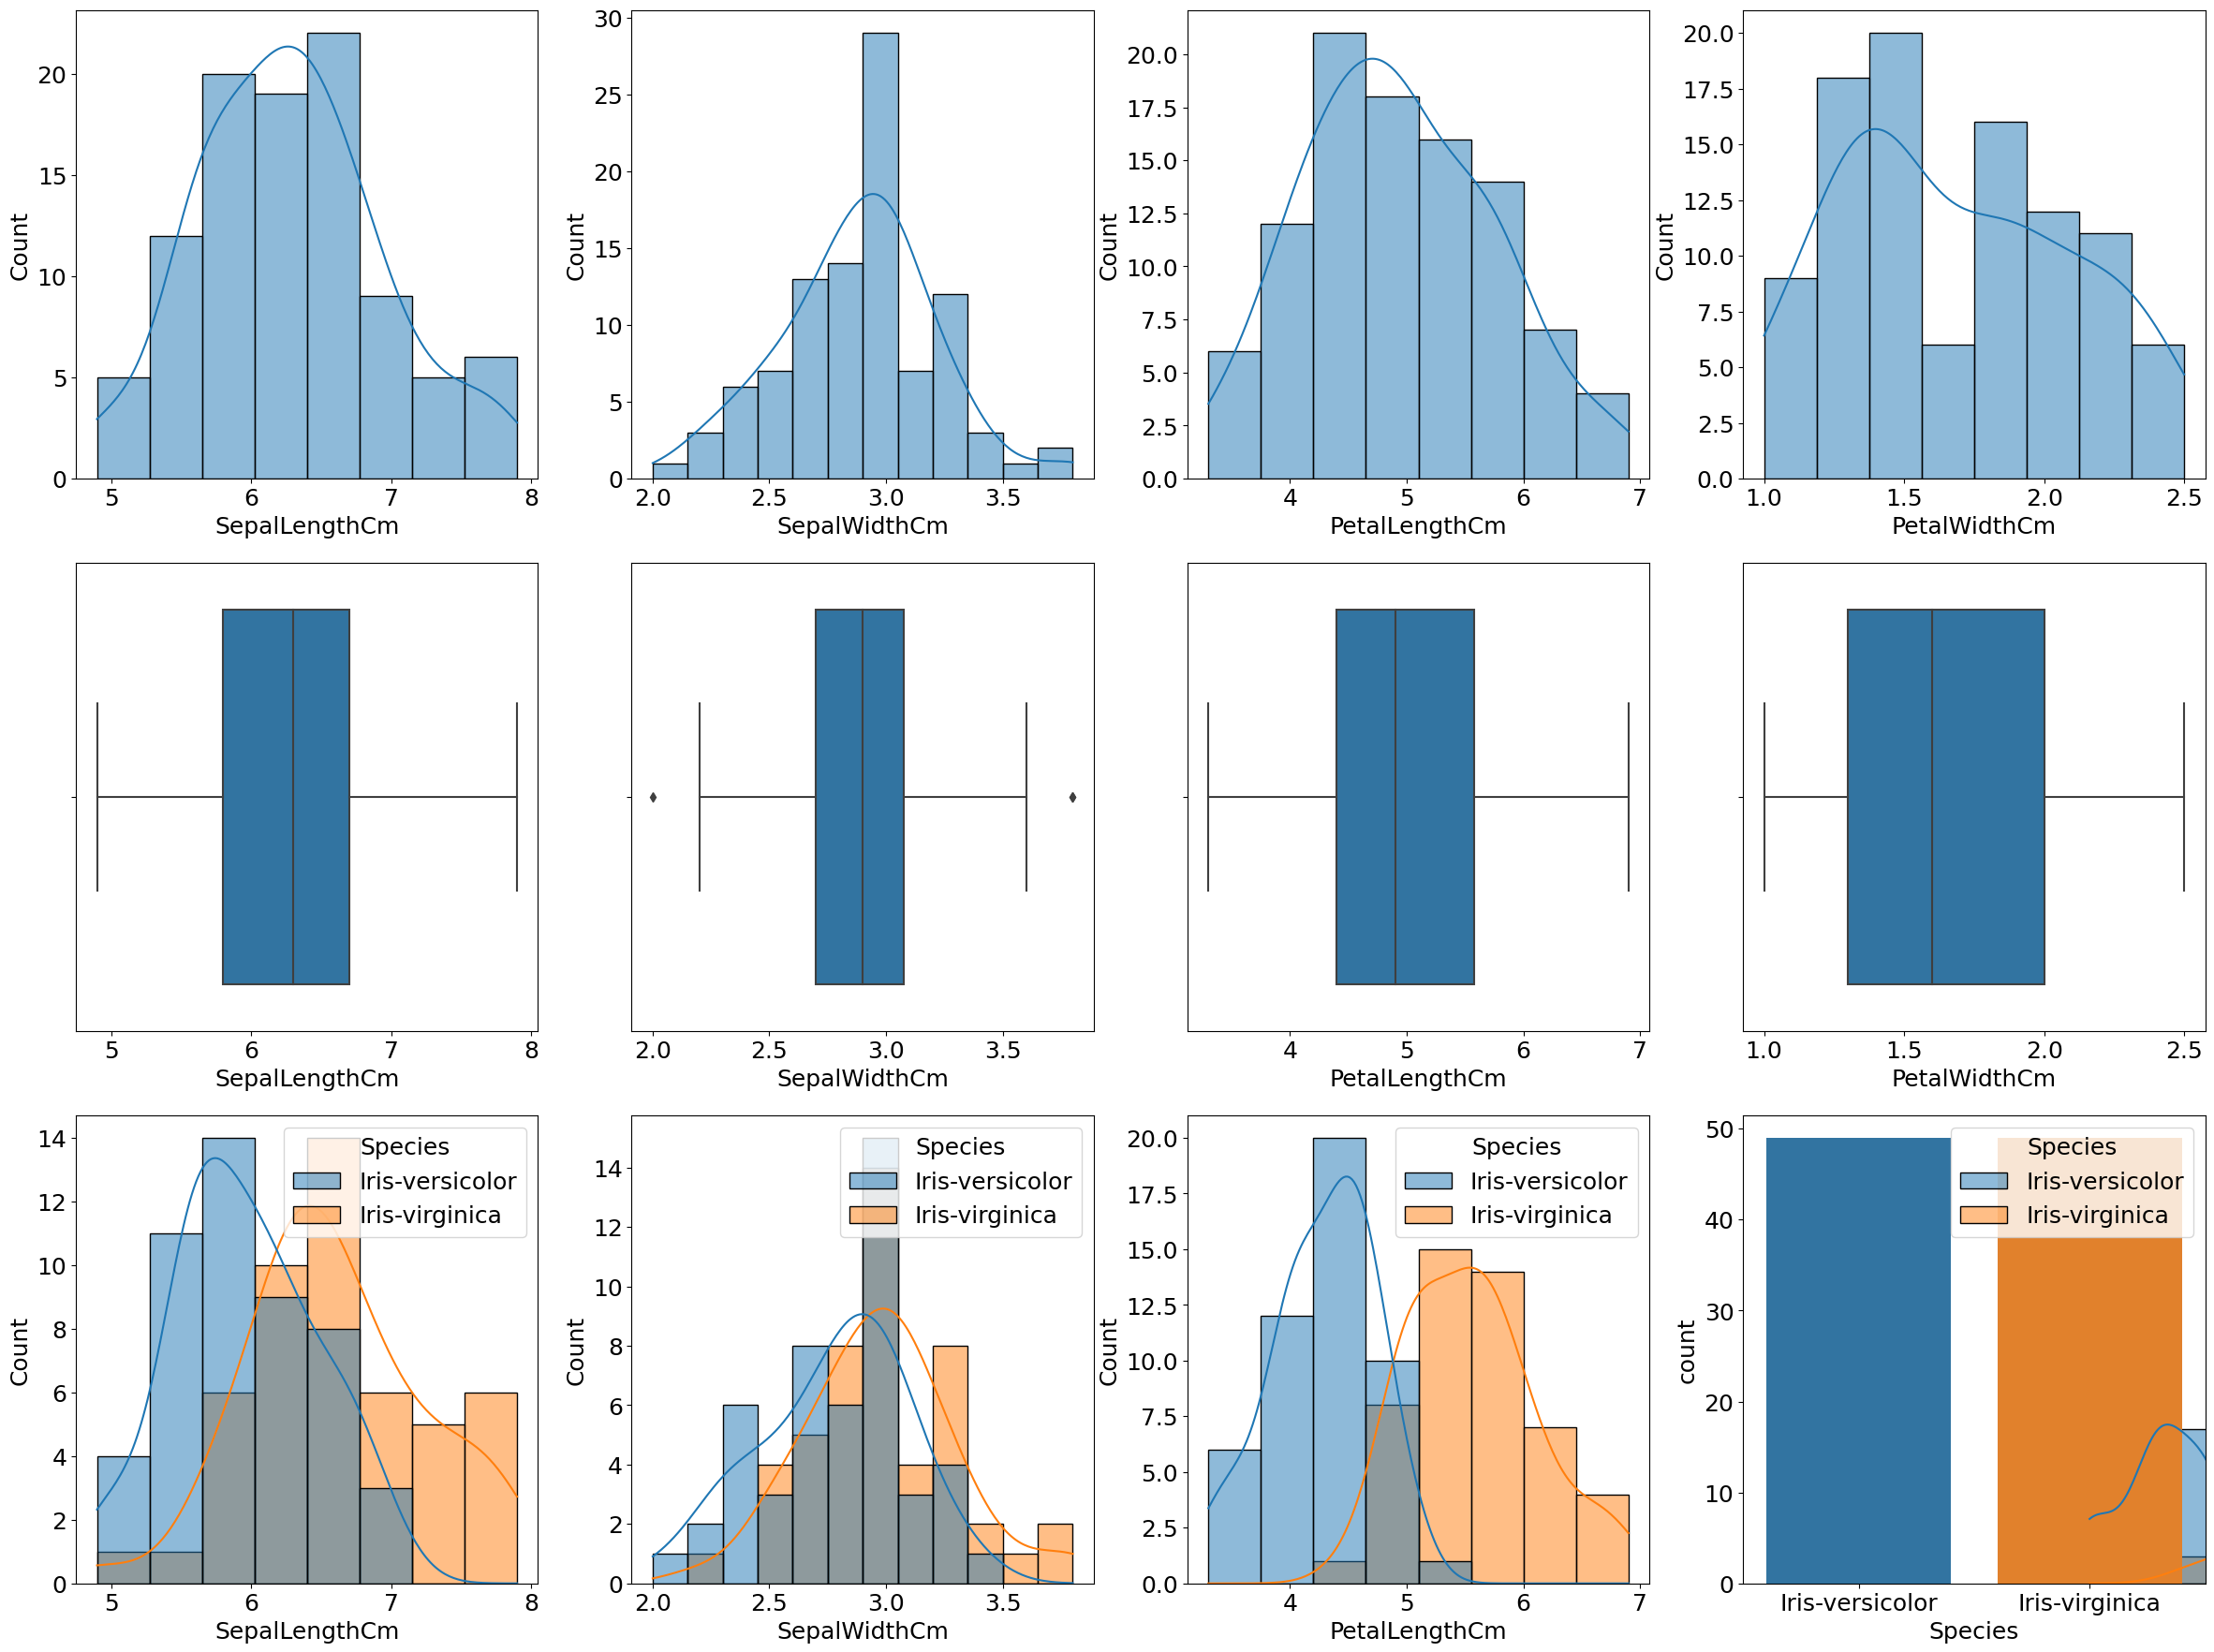

In [35]:
plot_cluster(cluster2)

In [36]:
cluster3.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,22.000000,22.000000,22.000000,22.000000
mean,4.713636,3.095455,1.481818,0.240909
std,0.225294,0.285319,0.388693,0.199187
min,4.300000,2.300000,1.000000,0.100000
25%,4.600000,3.000000,1.300000,0.200000
50%,4.750000,3.100000,1.400000,0.200000
75%,4.875000,3.200000,1.575000,0.200000
max,5.100000,3.600000,3.000000,1.100000


- Rata-rata panjang kelopak (SepalLengthCm) adalah 5.28 cm
- Rata-rata lebar kelopak (SepalWidthCm) adalah 3.71 cm
- Rata-rata panjang mahkota (PetalLengthCm) adalah 1.49 cm
- Rata-rata lebar mahkota (PetalWidthCm) adalah 0.28 cm
- Jumlah pengamatan pada cluster 3 adalah 24
- Rentang nilai pada setiap fitur:
  1. SepalLengthCm: antara 5.0 cm hingga 5.8 cm
  2. SepalWidthCm: antara 3.4 cm hingga 4.4 cm
  3. PetalLengthCm: antara 1.2 cm hingga 1.5 cm
  4. PetalWidthCm: antara 0.1 cm hingga 0.4 cm

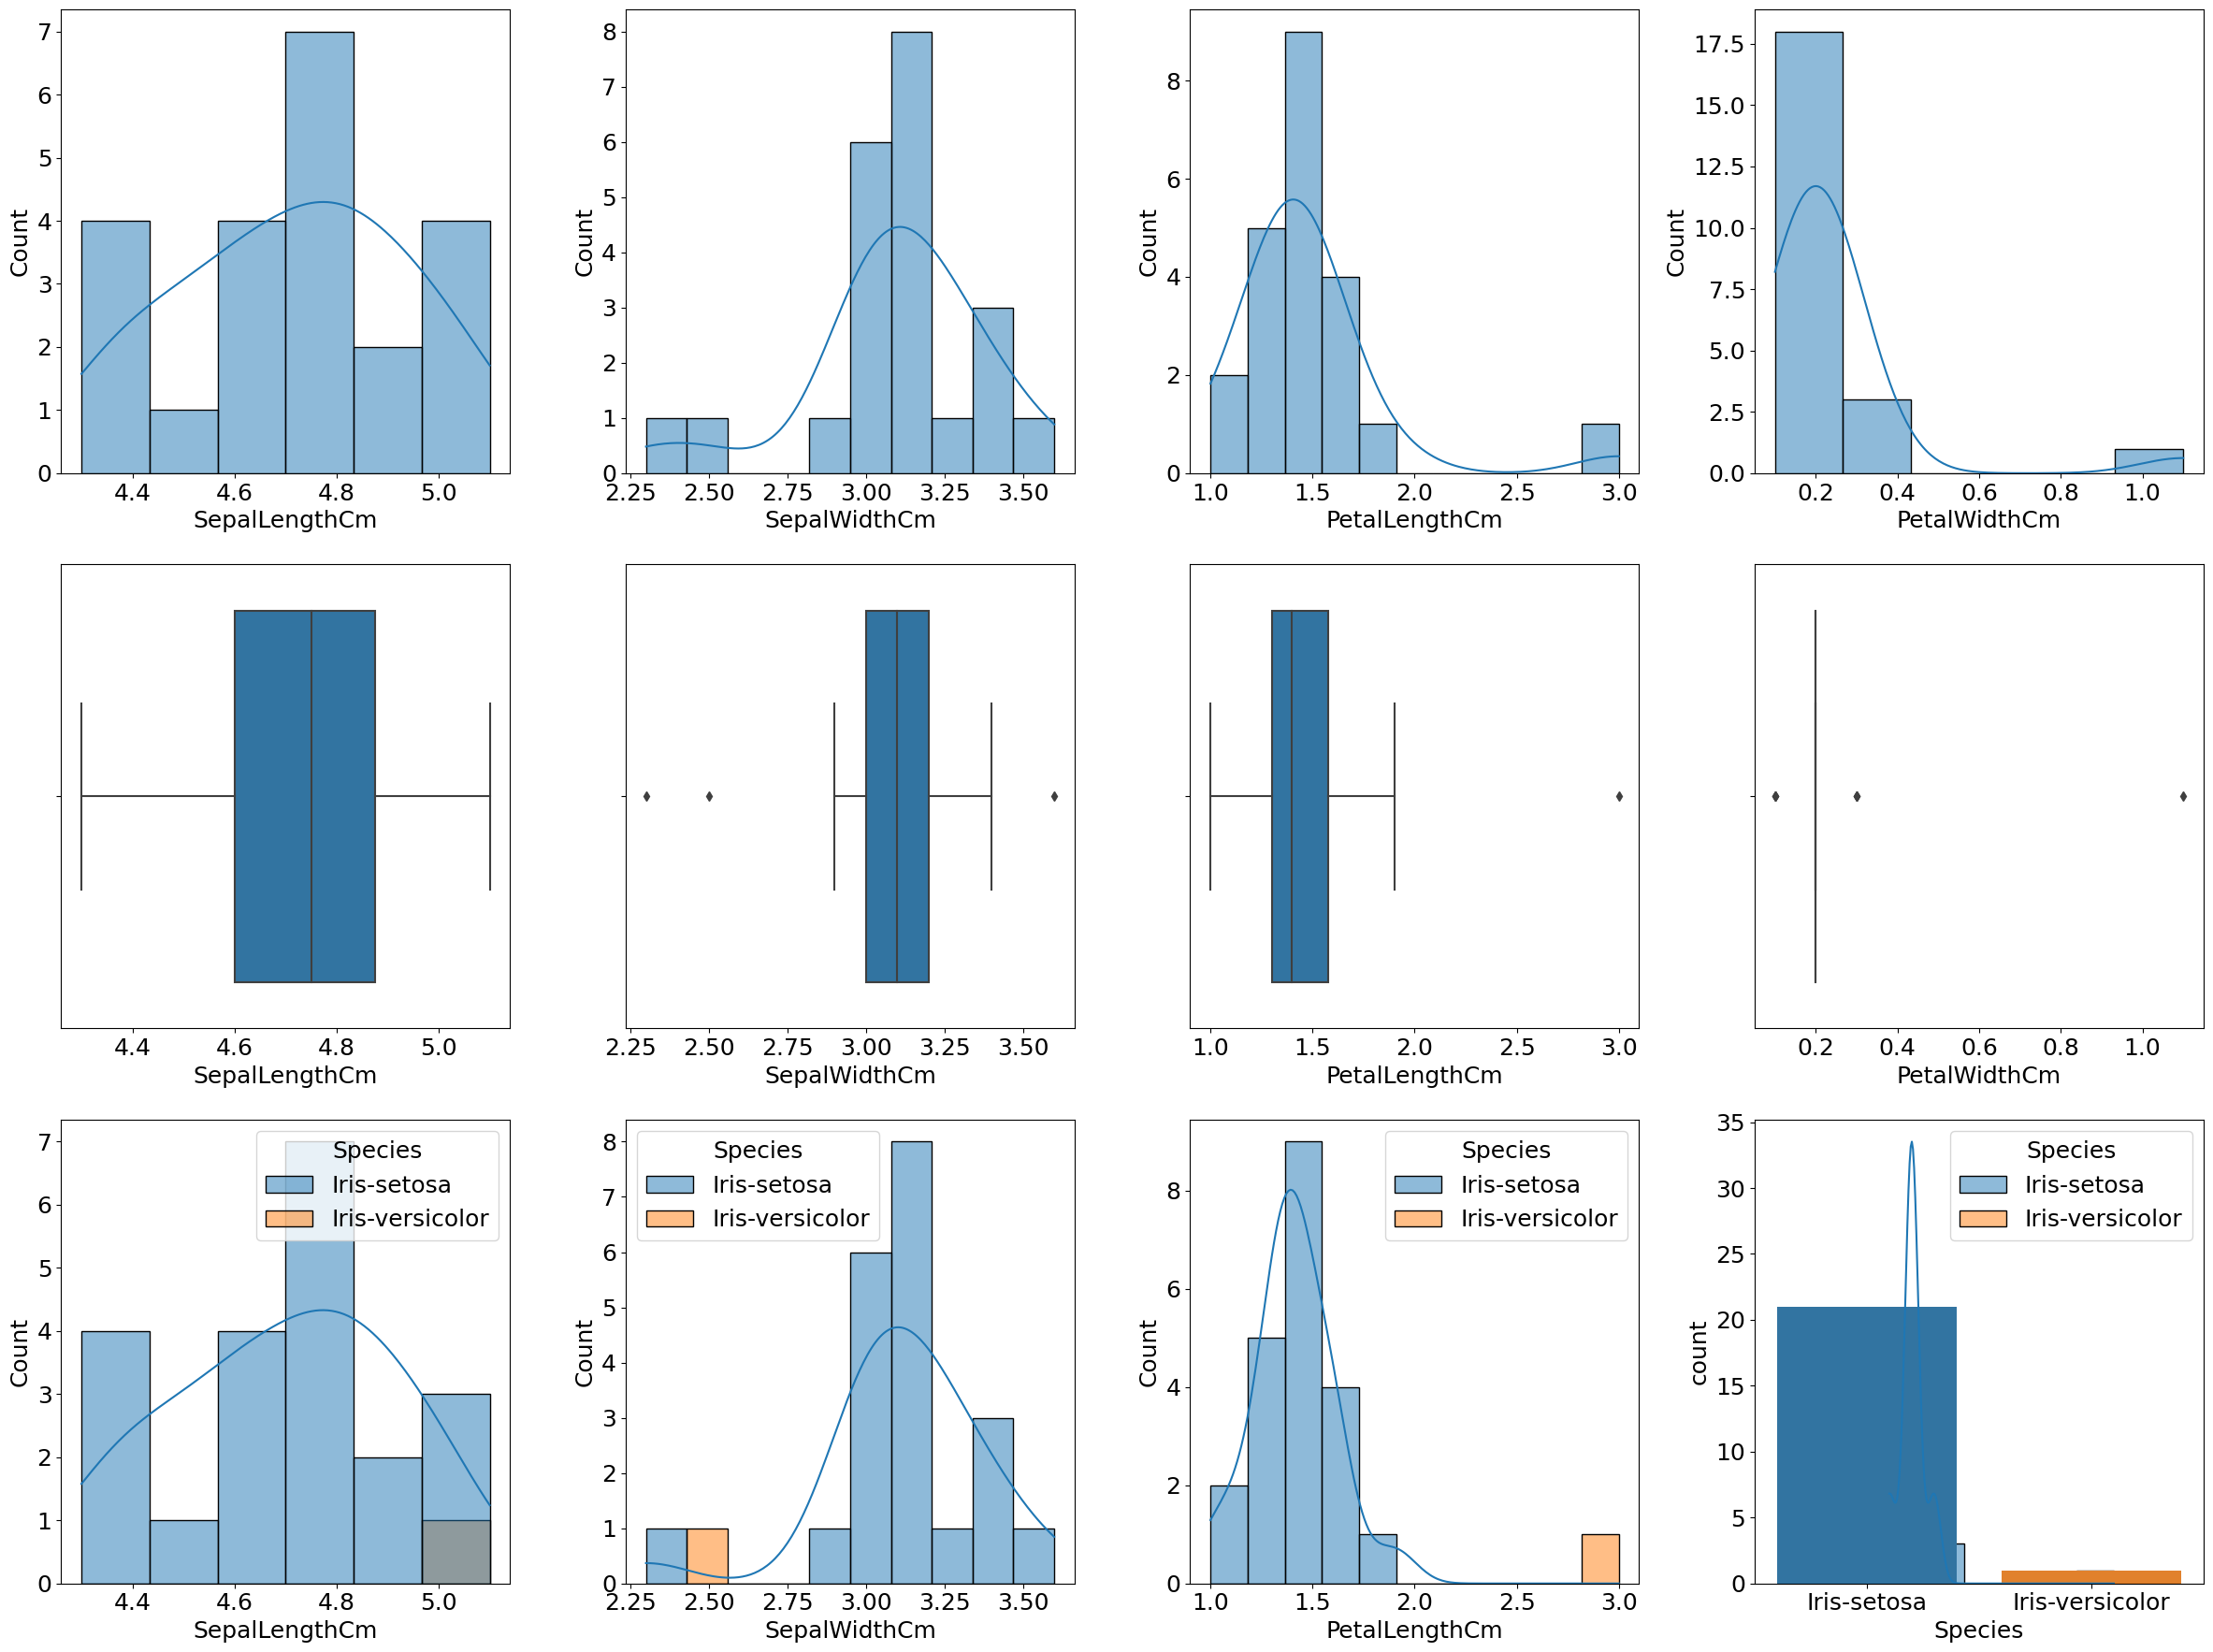

In [37]:
plot_cluster(cluster3)

###3D Plotting

In [38]:
import plotly.express as px

fig = px.scatter_3d(df2, x='SepalLengthCm', y='SepalWidthCm', z='Species_Iris-setosa', color='cluster', color_continuous_scale=px.colors.qualitative.Light24)

fig.update_layout(
    title='Cluster Plot for Iris Dataset',
    scene=dict(
        xaxis_title='Sepal Length (cm)',
        yaxis_title='Sepal Width (cm)',
        zaxis_title='Species - Iris setosa'
    )
)

fig.show()

In [39]:
import plotly.express as px

fig = px.scatter_3d(df2, x='PetalLengthCm', y='PetalWidthCm', z='Species_Iris-setosa', color='cluster',
                    color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

fig.update_layout(title='K-Means Clustering for Iris Dataset', 
                  scene=dict(xaxis_title='Petal Length (cm)',
                             yaxis_title='Petal Width (cm)',
                             zaxis_title='Species (Iris-setosa)'),
                  width=800, height=600)

fig.show()

##Evaluation

Matriks evaluasi yang digunakan dalam analisis ini adalah Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Silhouette Score digunakan untuk mengukur seberapa dekat setiap titik pada klaster tertentu dibandingkan dengan klaster lainnya. Semakin tinggi nilai Silhouette Score, semakin baik kualitas klaster tersebut. Calinski-Harabasz Score digunakan untuk mengukur rasio antara variansi yang dijelaskan oleh klaster dan variansi di antara klaster. Semakin tinggi nilai Calinski-Harabasz Score, semakin baik algoritma clustering tersebut. Sedangkan Davies-Bouldin Score digunakan untuk mengukur jarak antara klaster dan meminimalkan jarak antar klaster. Semakin rendah nilai Davies-Bouldin Score, semakin baik kualitas klaster tersebut.

Untuk menilai kualitas klaster yang dihasilkan oleh algoritma clustering pada setiap matriks evaluasi, digunakan kriteria sebagai berikut:

1. Silhouette Score: semakin mendekati nilai Silhouette Score ke 1, semakin baik kualitas klaster. Sedangkan nilai yang mendekati -1 menunjukkan kualitas klaster yang buruk.
2. Calinski-Harabasz Score: semakin tinggi nilai Calinski-Harabasz Score, semakin baik kualitas klaster. Sedangkan nilai yang rendah menunjukkan klaster yang tidak terpisah dengan baik.
3. Davies-Bouldin Score: semakin rendah nilai Davies-Bouldin Score, semakin baik kualitas klaster. Sedangkan nilai yang tinggi menunjukkan klaster yang saling tumpang tindih.

In [40]:
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


Metric,Score
Silhouette Score,0.506994
Calinski-Harabasz Score,207.731409
Davies-Bouldin Score,0.820282


##Deployment

Melakukan kesimpulan dari analisis dan menyimpan data hasil klustering ke dalam sebuah file dengan format csv untuk dapat digunakan dalam aplikasi Looker Studio atau Google Data Studio.

In [41]:
X_train_decoded.to_csv('Iris Species - Deployment.csv', index=False )